##Modelling Pipeline

In [1]:
!python --version

Python 3.7.13


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# read in data
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-01-18/chocolate.csv'

df = pd.read_csv(url)
df.head()

,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"3- B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72%,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00


In [5]:
# set data types

df['ref'] = df['ref'].astype('string')
#df['company_manufacturer'] = pd.to_numeric(df['company_manufacturer'], errors='coerce')
df['company_manufacturer'] = df['company_manufacturer'].astype('string')
df['company_location'] = df['company_location'].astype('string')
#df['review_date'] = pd.to_datetime(df['review_date'], errors='coerce')
#df['review_date'] = df['review_date'].astype('string')
df['country_of_bean_origin'] = df['country_of_bean_origin'].astype('string')
df['specific_bean_origin_or_bar_name'] = df['specific_bean_origin_or_bar_name'].astype('string')

df['cocoa_percent'] = df['cocoa_percent'].astype('string') # to string
df['cocoa_percent'] = df['cocoa_percent'].str.replace('%','') # remove %
df['cocoa_percent'] = pd.to_numeric(df['cocoa_percent'], errors='coerce')
df['ingredients'] = df['ingredients'].astype('string')
df['most_memorable_characteristics'] = df['most_memorable_characteristics'].astype('string')


In [10]:
df.head()

,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,"3- B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,"3- B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ref                               2530 non-null   string 
 1   company_manufacturer              2530 non-null   string 
 2   company_location                  2530 non-null   string 
 3   review_date                       2530 non-null   int64  
 4   country_of_bean_origin            2530 non-null   string 
 5   specific_bean_origin_or_bar_name  2530 non-null   string 
 6   cocoa_percent                     2530 non-null   float64
 7   ingredients                       2443 non-null   string 
 8   most_memorable_characteristics    2530 non-null   string 
 9   rating                            2530 non-null   float64
dtypes: float64(2), int64(1), string(7)
memory usage: 197.8 KB


###EDA

####Univariate Analysis

In [7]:
df.describe()

,review_date,cocoa_percent,rating
count,2530.000000,2530.000000,2530.000000
mean,2014.374308,71.639723,3.196344
std,3.968267,5.616724,0.445321
min,2006.000000,42.000000,1.000000
25%,2012.000000,70.000000,3.000000
50%,2015.000000,70.000000,3.250000
75%,2018.000000,74.000000,3.500000
max,2021.000000,100.000000,4.000000


In [8]:
# Check unique values per column using list comprehension - Alt 1 - Dont use this!
cols = [col for col in df]
unique_values = [unique for unique in df.nunique()]
cols_with_unique_values = list(zip(cols, unique_values))
cols_with_unique_values

[('ref', 630),
 ('company_manufacturer', 580),
 ('company_location', 67),
 ('review_date', 16),
 ('country_of_bean_origin', 62),
 ('specific_bean_origin_or_bar_name', 1605),
 ('cocoa_percent', 46),
 ('ingredients', 21),
 ('most_memorable_characteristics', 2487),
 ('rating', 12)]

In [9]:
# Check unique values per column using built in pandas method - Alt 2 - Use this!
print(df.nunique())

ref                                  630
company_manufacturer                 580
company_location                      67
review_date                           16
country_of_bean_origin                62
specific_bean_origin_or_bar_name    1605
cocoa_percent                         46
ingredients                           21
most_memorable_characteristics      2487
rating                                12
dtype: int64


In [29]:
df_num = df[['cocoa_percent','rating','review_date']]
df_num.head(1)

,cocoa_percent,rating,review_date
0,76.0,3.25,2019


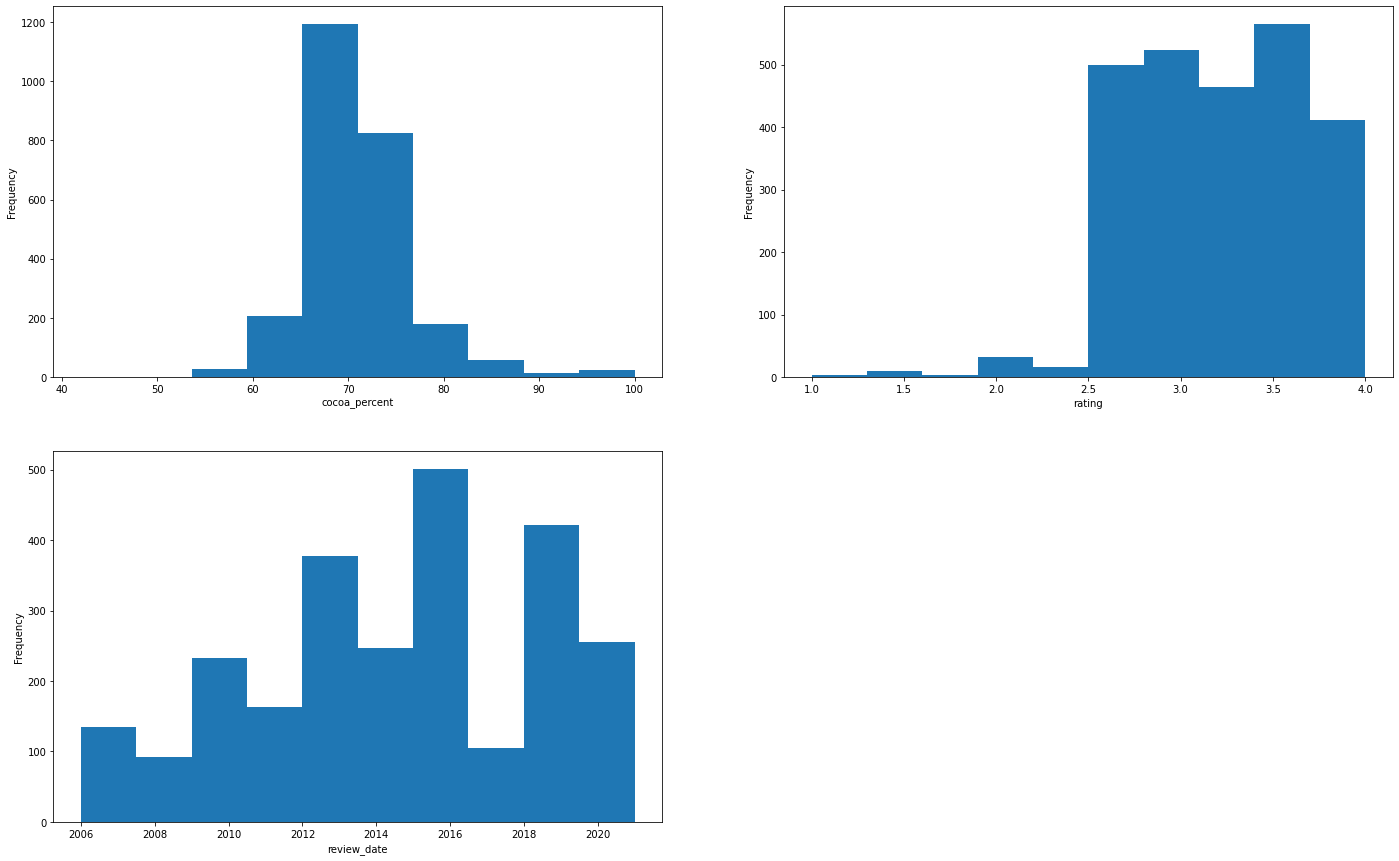

In [30]:
fig = plt.figure(figsize=(24,15))
i = 0

for column in df_num:
  sub = fig.add_subplot(2,2, i + 1)
  sub.set_xlabel(column)
  df[column].plot(kind = 'hist')
  i += 1

In [14]:
# create binary label of rating
df['label'] = np.where(df['rating'] > 3, True, False)

In [15]:
df.head()

,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating,label
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,"3- B,S,C","rich cocoa, fatty, bready",3.25,True
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,"3- B,S,C","cocoa, vegetal, savory",3.50,True
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,"3- B,S,C","cocoa, blackberry, full body",3.75,True
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,"3- B,S,C","chewy, off, rubbery",3.00,False
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00,False


In [81]:
label_counts = df['label'].value_counts()
label_counts

True     1441
False    1089
Name: label, dtype: int64

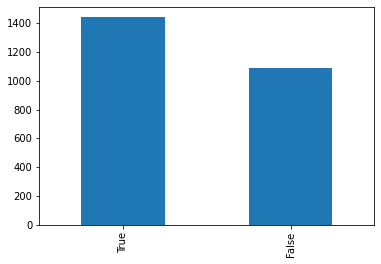

In [82]:
label_counts.plot(kind='bar')
plt.show()

In [16]:
import seaborn as sns

####Categorical Features

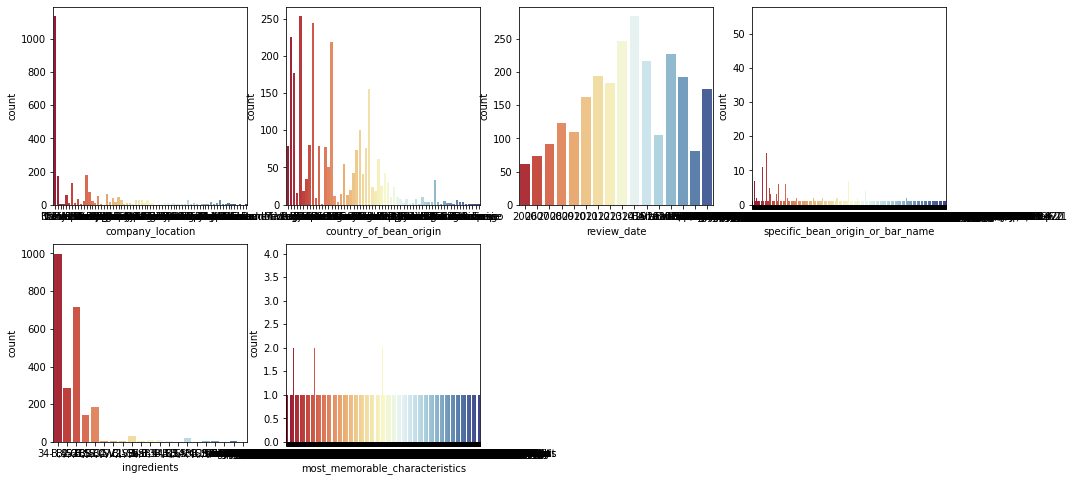

In [35]:
cat_list = ["company_location","country_of_bean_origin","review_date","specific_bean_origin_or_bar_name","ingredients","most_memorable_characteristics"]
fig = plt.figure(figsize=(16,8))

for i in range(len(cat_list)):
  column = cat_list[i]
  sub = fig.add_subplot(2, 4, i + 1)
  chart = sns.countplot(data = df,
                        x = column,
                        #hue = 'label',
                        palette = 'RdYlBu')


From above we see that there are too many values of the categorical features for the plot to be meaningfull

In [32]:
df_us = df[df['company_location']=='U.S.A.']
print(df_us.shape)
df_us.head()

(1136, 11)


,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating,label
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,"3- B,S,C","rich cocoa, fatty, bready",3.25,True
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,"3- B,S,C","cocoa, vegetal, savory",3.50,True
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,"3- B,S,C","cocoa, blackberry, full body",3.75,True
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,"3- B,S,C","chewy, off, rubbery",3.00,False
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00,False


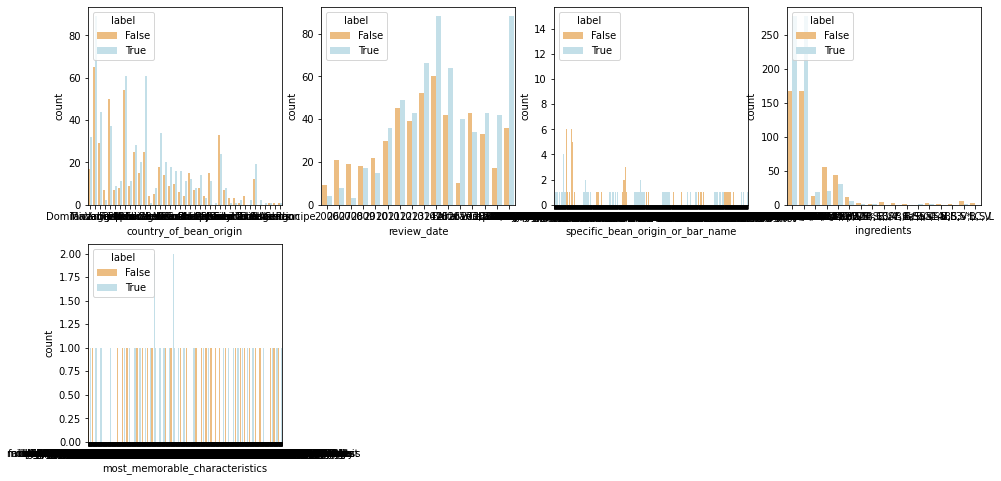

In [33]:
cat_list = ["country_of_bean_origin","review_date","specific_bean_origin_or_bar_name","ingredients","most_memorable_characteristics"]
fig = plt.figure(figsize=(16,8))

for i in range(len(cat_list)):
  column = cat_list[i]
  sub = fig.add_subplot(2, 4, i + 1)
  chart = sns.countplot(data = df_us,
                        x = column,
                        hue = 'label',
                        palette = 'RdYlBu')

####Numerical Features vs Target in Box Plot

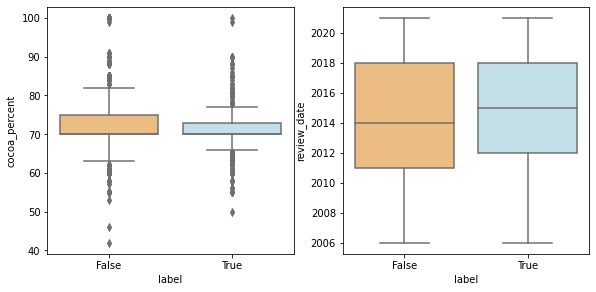

In [37]:
# box plot TBD
num_list = ['cocoa_percent','review_date']
fig = plt.figure(figsize=(15,10))

for i in range(len(num_list)):
  column = num_list[i]
  sub = fig.add_subplot(2, 3, i + 1)
  sns.boxplot(x = 'label', y = column, data = df, palette = "RdYlBu")

There is slight difference in median review_date vs the label, not much but still test these two numberical variables as features for the first modeling pipeline.

In [38]:
df_num  = df[['cocoa_percent','review_date']]
df_num.head()

,cocoa_percent,review_date
0,76.0,2019
1,76.0,2019
2,76.0,2019
3,68.0,2021
4,72.0,2021


In [111]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X = df_num[['cocoa_percent','review_date']].values
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y) # added stratify to improve accuracy a bit

In [112]:
print(X_train.shape)
print(y_train.shape)

(1695, 2)
(1695,)


###Machine Learning Model Pipeline

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

model_pipeline = []
model_pipeline.append(LogisticRegression(solver='liblinear'))
model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())
model_pipeline.append(GaussianNB())

###Model Evaluation

In [114]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model_list =['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes']
acc_list = []
auc_list = []
cm_list = []

for model in model_pipeline:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  acc_list.append(metrics.accuracy_score(y_test, y_pred))
  fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
  auc_list.append(round(metrics.auc(fpr, tpr),2))
  cm_list.append(confusion_matrix(y_test, y_pred))

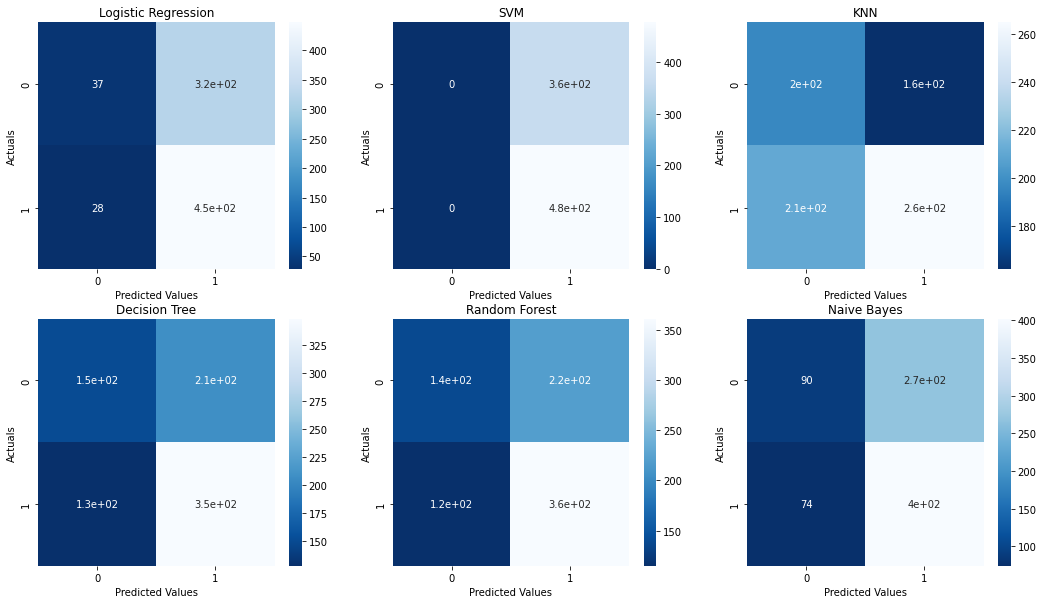

In [115]:
# plot confusion matrix
fig = plt.figure(figsize = (18, 10))

for i in range(len(cm_list)):
  cm = cm_list[i]
  model = model_list[i]
  sub = fig.add_subplot(2, 3, i+1).set_title(model)
  cm_plot =sns.heatmap(cm, annot=True, cmap= 'Blues_r')
  cm_plot.set_xlabel('Predicted Values')
  cm_plot.set_ylabel('Actuals')


In [116]:
# accuracy 
result_df = pd.DataFrame({'Model':model_list, 'Accuracy': acc_list, 'AUC': auc_list})
result_df

,Model,Accuracy,AUC
0,Logistic Regression,0.580838,0.52
1,SVM,0.570060,0.50
2,KNN,0.553293,0.55
3,Decision Tree,0.597605,0.58
4,Random Forest,0.598802,0.57
5,Naive Bayes,0.589222,0.55


As expected the features `cocoa_percent` and `review_date` are poor at predicting the binary label of high rating, regardless of modelling approach.

In [119]:
# Fit one classifier manually...
knn = KNeighborsClassifier(n_neighbors=6) # Large k, simpler model, risk of underfitting. Small k, complex model, risk of overfitting
knn.fit(X_train, y_train)
print(f"accuracy: {knn.score(X_test, y_test)}")

# ...predict on some new unlabeled data
X_new = np.array([[60, 2015],
                  [70, 2017],
                  [80, 2019]])
print(X_new.shape)

#KNeighborsClassifier.predict(X_new)
predictions = knn.predict(X_new)
print(f"predictions: {predictions}")

accuracy: 0.5497005988023952
(3, 2)
predictions: [False  True  True]


In [131]:
# Model complexity, over and underfitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y) 

train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 26)

for neighbor in neighbors:
  knn = KNeighborsClassifier(n_neighbors=neighbor)
  knn.fit(X_train, y_train)
  train_accuracies[neighbor] = knn.score(X_train, y_train) 
  test_accuracies[neighbor] = knn.score(X_test, y_test)

In [132]:
print(neighbors)
print(train_accuracies.values())
print(test_accuracies.values())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]
dict_values([0.5828908554572272, 0.5575221238938053, 0.5946902654867257, 0.5740412979351033, 0.6383480825958702, 0.6224188790560472, 0.6625368731563421, 0.6407079646017699, 0.6619469026548672, 0.6566371681415929, 0.6572271386430678, 0.6495575221238938, 0.6513274336283186, 0.6442477876106195, 0.6530973451327433, 0.6407079646017699, 0.6448377581120944, 0.6448377581120944, 0.6389380530973451, 0.6483775811209439, 0.6448377581120944, 0.6365781710914454, 0.6436578171091445, 0.640117994100295, 0.640117994100295])
dict_values([0.5341317365269461, 0.4934131736526946, 0.5377245508982036, 0.5149700598802395, 0.5532934131736527, 0.5497005988023952, 0.5736526946107784, 0.5640718562874252, 0.5808383233532934, 0.5964071856287425, 0.5880239520958084, 0.6035928143712574, 0.5868263473053892, 0.5880239520958084, 0.5880239520958084, 0.5880239520958084, 0.5820359281437125, 0.5916167664670658, 0.5712574850299401, 0.576047904191616

ValueError: ignored

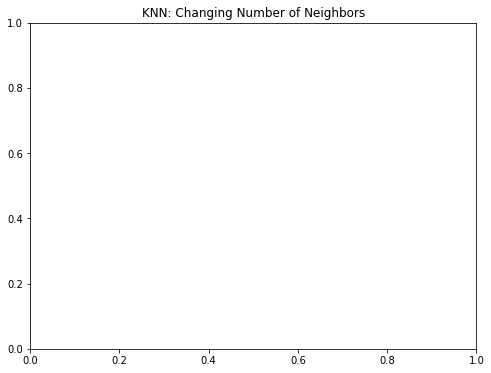

In [137]:
# plot accuracies
plt.figure(figsize=(8, 6))
plt.title("KNN: Changing Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label='Training Accuracy')
plt.plot(neighbors, test_accuracies.values(), label='Testing Accuracy')
plt.legend()
plt.xlabel("Nbr of Neighbors")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
# JATKA TÄSTÄ. SELVITÄ MIKÄ ON VIKA! ALLA UUSI YRITYS, SAMA JUTTU!

In [136]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.5810276679841897


In [138]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
  	# Set up a KNN Classifier
  	knn = KNeighborsClassifier(n_neighbors=neighbor)
  
  	# Fit the model
  	knn.fit(X_train, y_train)
  
  	# Compute accuracy
  	train_accuracies[neighbor] = knn.score(X_train, y_train)
  	test_accuracies[neighbor] = knn.score(X_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 0.6269762845849802, 2: 0.5899209486166008, 3: 0.6615612648221344, 4: 0.6309288537549407, 5: 0.6358695652173914, 6: 0.633893280632411, 7: 0.6408102766798419, 8: 0.6299407114624506, 9: 0.6556324110671937, 10: 0.6363636363636364, 11: 0.6447628458498024, 12: 0.6368577075098815} 
 {1: 0.5316205533596838, 2: 0.5217391304347826, 3: 0.5948616600790514, 4: 0.567193675889328, 5: 0.5810276679841897, 6: 0.5790513833992095, 7: 0.5830039525691699, 8: 0.5553359683794467, 9: 0.5691699604743083, 10: 0.5612648221343873, 11: 0.5770750988142292, 12: 0.5632411067193676}


ValueError: ignored

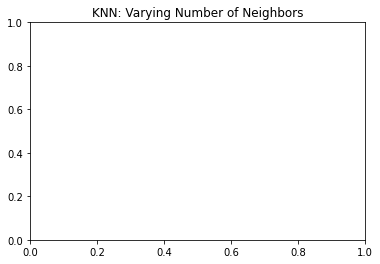

In [139]:
# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()